## Tarefa 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

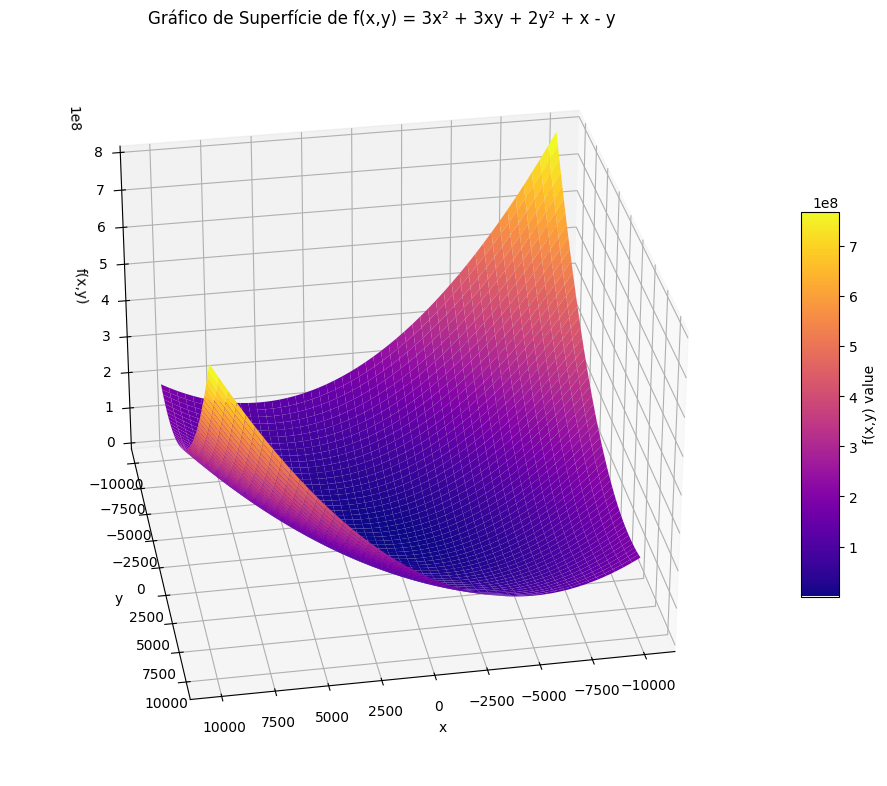

In [2]:
# a) Plotar f(x,y)

# Define a função f(x, y)
def f(x, y):
    return 3*x**2 + 3*x*y + 2*y**2 + x - y

# Crie um meshgrid para x e y com um intervalo maior
x = np.linspace(-10000, 10000, 5000) # Intervalo ampliado
y = np.linspace(-10000, 10000, 5000) # Intervalo ampliado
X, Y = np.meshgrid(x, y)

# Calcule os valores de Z usando a função f(x, y)
Z = f(X, Y)

# Crie a figura e o eixo 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plote a superfície com um novo colormap e salve o objeto da superfície
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

# Adicione uma barra de cores para melhor interpretação
fig.colorbar(surf, shrink=0.5, aspect=10, label='f(x,y) value')

# Adicione rótulos aos eixos
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Gráfico de Superfície de f(x,y) = 3x² + 3xy + 2y² + x - y')

# Ajuste o ângulo de visão
ax.view_init(elev=30, azim=80)

# Mostre o gráfico
plt.show()

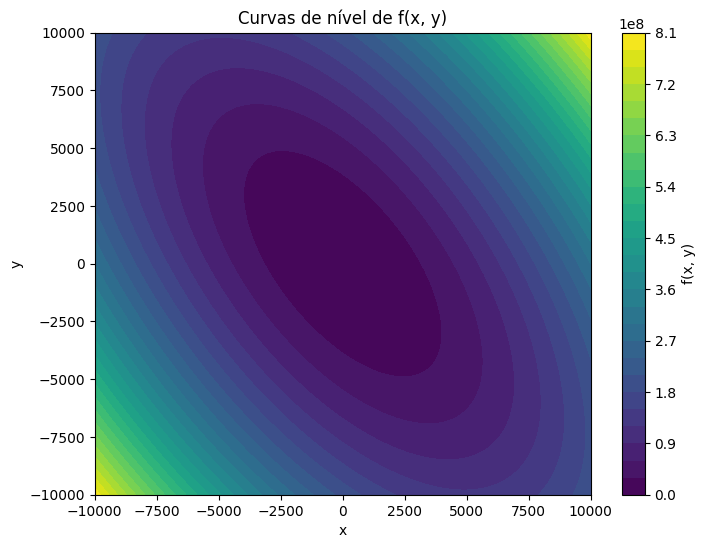

In [3]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nível de f(x, y)')
plt.show()


In [4]:
# b) vetor gradiente = (6x + 3y +1, 4y + 3x -1)

In [5]:
# c) determinar ponto de mínimo, pontos do vetor gradiente tendendo a zero

def grad_f(x, y):
    # ∇f = (6x + 3y + 1, 3x + 4y - 1)
    return np.array([6*x + 3*y + 1, 3*x + 4*y - 1], dtype=float)

# Parâmetros
alpha = 0.1
tol = 1e-5
max_iters = 100000

# Inicialização
x, y = 0.0, 0.0
g = grad_f(x, y)
it = 0

#  gradient descent
while np.linalg.norm(g, ord=2) > tol and it < max_iters:
    x, y = np.array([x, y]) - alpha * g
    g = grad_f(x, y)
    it += 1

print(f"Iterações: {it}")
print(f"Ponto de mínimo aproximado: (x, y) = ({x:.10f}, {y:.10f})")
print(f"||∇f|| = {np.linalg.norm(g):.3e}")
print(f"f(x,y) = {f(x,y):.10f}")

Iterações: 59
Ponto de mínimo aproximado: (x, y) = (-0.4666638844, 0.5999961398)
||∇f|| = 8.745e-06
f(x,y) = -0.5333333333


In [6]:
# d) ) Repita o procedimento para os seguintes valores do passo: 𝛼 = 0,15, 𝛼 = 0,2, 𝛼 = 0,3 e 𝛼 = 0,5

def gradient_descent(alpha, tol=1e-5, max_iters=100000):
    x, y = 0.0, 0.0
    g = grad_f(x, y)
    it = 0
    while np.linalg.norm(g) > tol and it < max_iters:
        x, y = np.array([x, y]) - alpha * g
        g = grad_f(x, y)
        it += 1
    return x, y, it, np.linalg.norm(g), f(x, y)

# Valores de alpha
alphas = [0.15, 0.2, 0.3, 0.5]

for alpha in alphas:
    x, y, it, norm_g, val = gradient_descent(alpha)
    print(f"α = {alpha}")
    print(f" -> Ponto mínimo aproximado: (x, y) = ({x:.6f}, {y:.6f})")
    print(f" -> f(x,y) = {val:.6f}")
    print(f" -> ||∇f|| = {norm_g:.2e}, Iterações: {it}\n")


α = 0.15
 -> Ponto mínimo aproximado: (x, y) = (-0.466664, 0.599996)
 -> f(x,y) = -0.533333
 -> ||∇f|| = 9.18e-06, Iterações: 37

α = 0.2
 -> Ponto mínimo aproximado: (x, y) = (-0.466664, 0.599996)
 -> f(x,y) = -0.533333
 -> ||∇f|| = 9.49e-06, Iterações: 26

α = 0.3
 -> Ponto mínimo aproximado: (x, y) = (nan, inf)
 -> f(x,y) = nan
 -> ||∇f|| = nan, Iterações: 1922

α = 0.5
 -> Ponto mínimo aproximado: (x, y) = (nan, nan)
 -> f(x,y) = nan
 -> ||∇f|| = nan, Iterações: 635



d:\Insper\cdados\.venv\Lib\site-packages\numpy\linalg\_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
C:\Users\djair\AppData\Local\Temp\ipykernel_8252\469810101.py:5: RuntimeWarning: overflow encountered in scalar add
  return np.array([6*x + 3*y + 1, 3*x + 4*y - 1], dtype=float)
C:\Users\djair\AppData\Local\Temp\ipykernel_8252\3266360120.py:8: RuntimeWarning: invalid value encountered in subtract
  x, y = np.array([x, y]) - alpha * g
C:\Users\djair\AppData\Local\Temp\ipykernel_8252\469810101.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([6*x + 3*y + 1, 3*x + 4*y - 1], dtype=float)


## Tarefa 2

In [7]:
# a) O mesmo procedimento para a função g

def g(x, y):
    return np.sqrt(x*x + y*y + 3) + x*x*np.exp(-y*y) + (x - 2)**2

def grad_g(x, y):
    r = np.sqrt(x*x + y*y + 3)
    gx = x/r + 2*x*np.exp(-y*y) + 2*(x - 2)
    gy = y/r - 2*y*(x**2)*np.exp(-y*y)
    return np.array([gx, gy], dtype=float)

def gradient_descent(alpha, x0=0.0, y0=0.0, tol=1e-6, max_iters=200000):
    x, y = float(x0), float(y0)
    for it in range(1, max_iters+1):
        gk = grad_g(x, y)
        ng = float(np.linalg.norm(gk))
        if not np.isfinite(ng):
            return None, None, it, np.inf, np.inf  # divergiu numericamente
        if ng < tol:
            return x, y, it, ng, g(x, y)
        x -= alpha * gk[0]
        y -= alpha * gk[1]
    return x, y, it, ng, g(x, y)

#  Encontrar os dois mínimos (ex.: α = 0.1)
alpha = 0.1
sol1 = gradient_descent(alpha, x0=0.0, y0=+3.0)  # um lado do vale
sol2 = gradient_descent(alpha, x0=0.0, y0=-3.0)  # lado simétrico

for tag, sol in [("Mínimo A", sol1), ("Mínimo B", sol2)]:
    x, y, it, ng, val = sol
    print(f"{tag}: (x,y)=({x:.6f}, {y:.6f}),  f={val:.6f},  ||∇f||={ng:.2e}, iters={it}")

Mínimo A: (x,y)=(1.612692, 1.645476),  f=3.205896,  ||∇f||=8.96e-07, iters=118
Mínimo B: (x,y)=(1.612692, -1.645476),  f=3.205896,  ||∇f||=8.96e-07, iters=118


## Tarefa 3

In [8]:
import numpy as np

# ---- função e gradiente ----
def h(x, y):
    r2 = x*x + y*y
    e1 = np.exp(-r2)                                  # pico em (0,0)
    e2 = np.exp(-((x-2)**2 + (y-3)**2))               # pico em (2,3)
    return 4*e1 + 3*e2 - x*x/9 - y*y/15 + 2

def grad_h(x, y):
    r2 = x*x + y*y
    e1 = np.exp(-r2)
    e2 = np.exp(-((x-2)**2 + (y-3)**2))
    # ∂h/∂x = -8x e^{-r2} - 6(x-2) e^{-((x-2)^2+(y-3)^2)} - (2/9)x
    # ∂h/∂y = -8y e^{-r2} - 6(y-3) e^{-((x-2)^2+(y-3)^2)} - (2/15)y
    hx = -8*x*e1 - 6*(x-2)*e2 - (2/9)*x
    hy = -8*y*e1 - 6*(y-3)*e2 - (2/15)*y
    return np.array([hx, hy], dtype=float)

# gradient ascent com passo fixo
def gradient_ascent(alpha, x0=0.0, y0=0.0, tol=1e-6, max_iters=200000):
    x, y = float(x0), float(y0)
    for it in range(1, max_iters+1):
        gk = grad_h(x, y)
        ng = float(np.linalg.norm(gk))
        if not np.isfinite(ng):
            return None, None, it, np.inf, np.inf, "divergiu-num"
        if ng < tol:
            return x, y, it, ng, h(x, y), "convergiu"
        # ascent: sobe na direção do gradiente
        x += alpha * gk[0]
        y += alpha * gk[1]
    return x, y, it, ng, h(x, y), "limite-iters"

# (1) Encontre os máximos (use alphas moderados, ex.: 0.1)
alpha = 0.1
candidatos = {
    "prox_origem": (0.0, 0.0),
    "prox_pico_2_3": (2.0, 3.0),
    "longe_1": (3.0, 4.0),
    "longe_2": (-2.0, -3.0),
}

print("Máximos locais (ascent, α=0.1):")
vistos = []
def ja_visto(px, py, L=1e-3):
    for (ux, uy) in vistos:
        if np.hypot(px-ux, py-uy) < L:
            return True
    return False

for nome, (x0, y0) in candidatos.items():
    x, y, it, ng, val, status = gradient_ascent(alpha, x0, y0)
    if x is None:
        print(f"{nome}: divergiu numericamente")
        continue
    if not ja_visto(x, y):
        vistos.append((x, y))
    print(f"{nome:>13}: (x,y)=({x:.6f}, {y:.6f}),  h={val:.6f},  ||∇h||={ng:.2e}, iters={it}, {status}")

# (2) Comportamento vs passo α para cada bacia de atração
alphas = [0.05, 0.1, 0.2, 0.3, 0.5]
starts = [(0,0), (2,3)]
print("\nEstabilidade por α (converge/diverge):")
for a in alphas:
    linha = []
    for (xi, yi) in starts:
        x, y, it, ng, val, status = gradient_ascent(a, xi, yi)
        if x is None or not np.isfinite(val):
            linha.append("diverge")
        else:
            linha.append("converge")
    print(f"α={a:>4}: {linha}")



Máximos locais (ascent, α=0.1):
  prox_origem: (x,y)=(0.000003, 0.000005),  h=6.000007,  ||∇h||=3.06e-07, iters=4, convergiu
prox_pico_2_3: (x,y)=(1.927901, 2.934155),  h=3.984623,  ||∇h||=5.85e-07, iters=16, convergiu
      longe_1: (x,y)=(1.927901, 2.934154),  h=3.984623,  ||∇h||=4.48e-07, iters=22, convergiu
      longe_2: (x,y)=(0.000003, 0.000005),  h=6.000007,  ||∇h||=3.20e-07, iters=55, convergiu

Estabilidade por α (converge/diverge):
α=0.05: ['converge', 'converge']
α= 0.1: ['converge', 'converge']
α= 0.2: ['converge', 'converge']
α= 0.3: ['converge', 'converge']
α= 0.5: ['converge', 'converge']


## Tarefa 4




In [9]:
import numpy as np

# f, grad e dados do problema
H = np.array([[6., 3.],
              [3., 4.]])
b = np.array([1., -1.])          # grad f(x)=H x + b
x0 = np.array([0., 0.], float)
tol = 1e-5
max_iters = 100000

def f(x):
    x = np.asarray(x)
    return 3*x[0]**2 + 3*x[0]*x[1] + 2*x[1]**2 + x[0] - x[1]

def grad(x):
    return H @ x + b

# 1) Passo fixo
def gd_fixed(alpha=0.1):
    x = x0.copy()
    g = grad(x); it = 0
    while np.linalg.norm(g) > tol and it < max_iters:
        x -= alpha * g
        g = grad(x); it += 1
    return x, it, np.linalg.norm(g), f(x)

# 2) Backtracking (Armijo)
def gd_backtracking(alpha0=1.0, beta=0.5, c=1e-4):
    x = x0.copy(); it = 0
    while it < max_iters:
        g = grad(x)
        if np.linalg.norm(g) <= tol: break
        alpha = alpha0
        fx = f(x)
        # Armijo: f(x - a g) <= f(x) - c a ||g||^2
        while f(x - alpha*g) > fx - c*alpha*(g@g):
            alpha *= beta
        x -= alpha * g
        it += 1
    return x, it, np.linalg.norm(grad(x)), f(x)

# 3) Busca exata (quadrática)
def gd_exact_linesearch():
    x = x0.copy(); it = 0
    g = grad(x)
    while np.linalg.norm(g) > tol and it < max_iters:
        denom = g @ (H @ g)
        alpha = (g @ g) / denom
        x -= alpha * g
        g = grad(x); it += 1
    return x, it, np.linalg.norm(g), f(x)

# Solução analítica (para conferência): H x* = -b
x_star = -np.linalg.solve(H, b)

# Rodando os três métodos
xf, itf, ngf, vf = gd_fixed(alpha=0.1)
xb, itb, ngb, vb = gd_backtracking(alpha0=1.0)
xe, ite, nge, ve = gd_exact_linesearch()

print("Solução analítica         :", x_star, " f* =", f(x_star))
print("\nGD passo fixo α=0.1       : x =", xf, "  it =", itf, "  ||∇f|| =", ngf, "  f =", vf)
print("GD backtracking (Armijo)  : x =", xb, "  it =", itb, "  ||∇f|| =", ngb, "  f =", vb)
print("GD busca exata (quadrát.) : x =", xe, "  it =", ite, "  ||∇f|| =", nge, "  f =", ve)


Solução analítica         : [-0.46666667  0.6       ]  f* = -0.5333333333333334

GD passo fixo α=0.1       : x = [-0.46666388  0.59999614]   it = 59   ||∇f|| = 8.74462368505424e-06   f = -0.5333333333125281
GD backtracking (Armijo)  : x = [-0.46666622  0.59999943]   it = 10   ||∇f|| = 1.3486991523486091e-06   f = -0.5333333333328483
GD busca exata (quadrát.) : x = [-0.46666622  0.59999943]   it = 10   ||∇f|| = 1.3486991523486091e-06   f = -0.5333333333328483
